In [1]:
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell_ast_node_Interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

%matplotlib inline

sns.set_style(style = 'white')
plt.style.use('ggplot')

In [3]:
data = pd.read_csv(r'C:\Users\CR GAYATHRI\Desktop\MachineLearning\Amaresh sir\Naive Bayes\Shared\diabetes.csv')

In [4]:
data.shape

(768, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# Columns with zero min values

# 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI'


data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


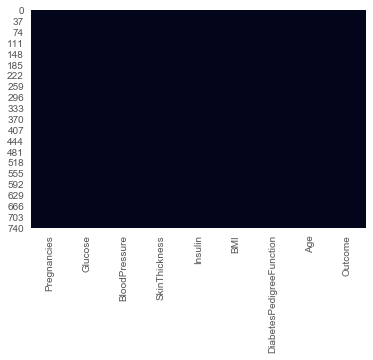

In [9]:
print(data.isnull().sum())

sns.heatmap(data.isnull(), cbar= False)

In [10]:
data[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [11]:
(data == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [12]:
(data.SkinThickness == 0).sum()

227

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


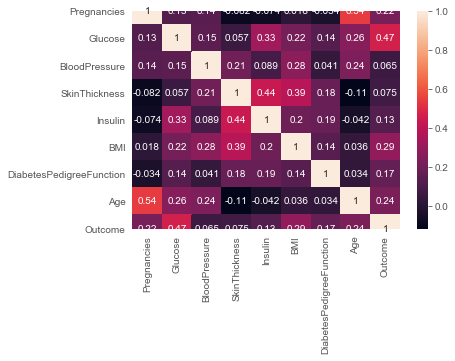

In [14]:
sns.heatmap(data.corr(), annot= True)

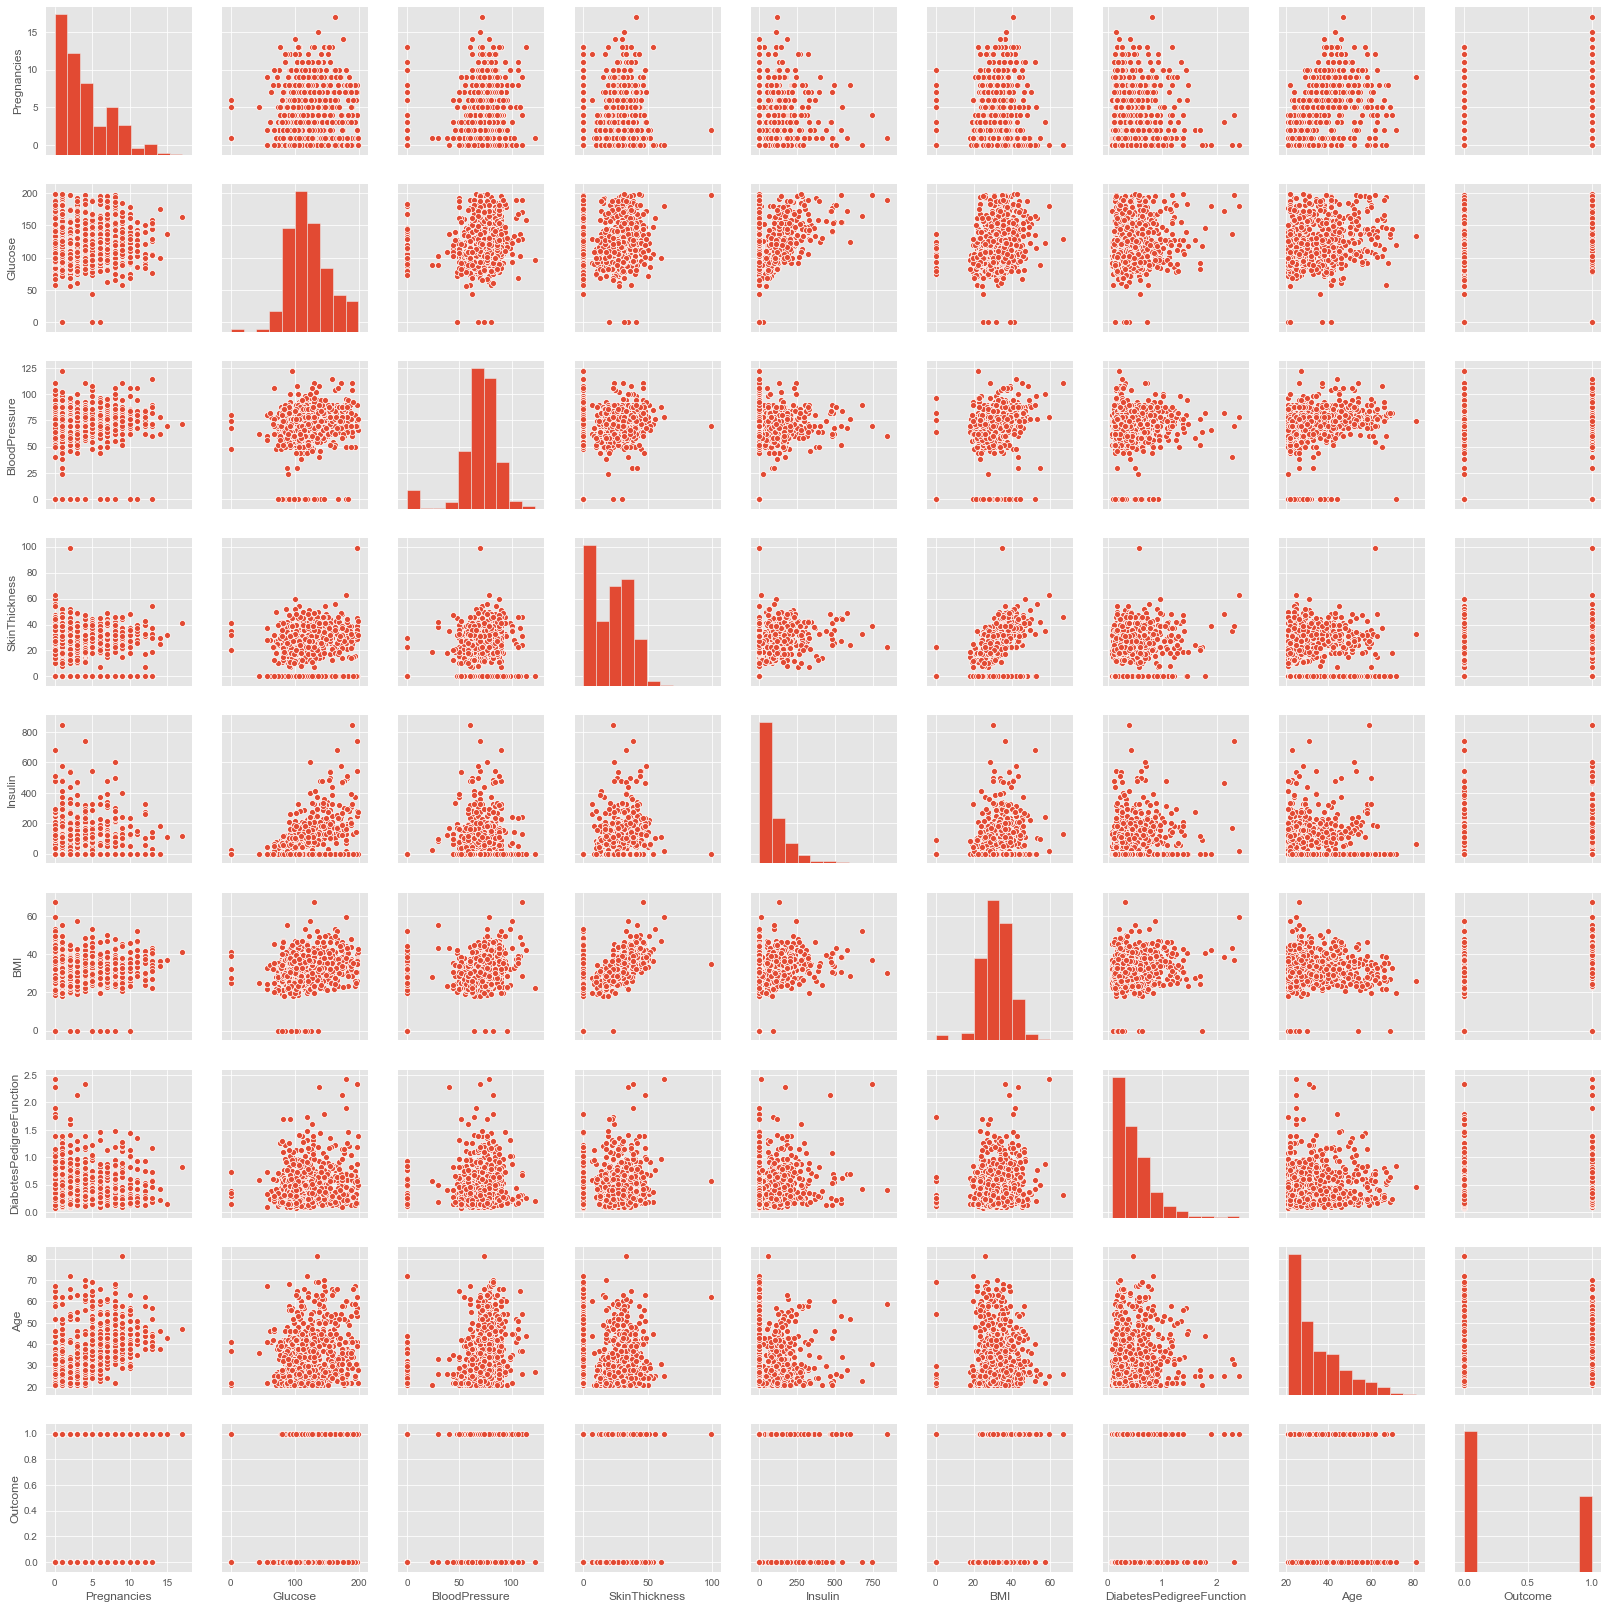

In [15]:
sns.pairplot(data)

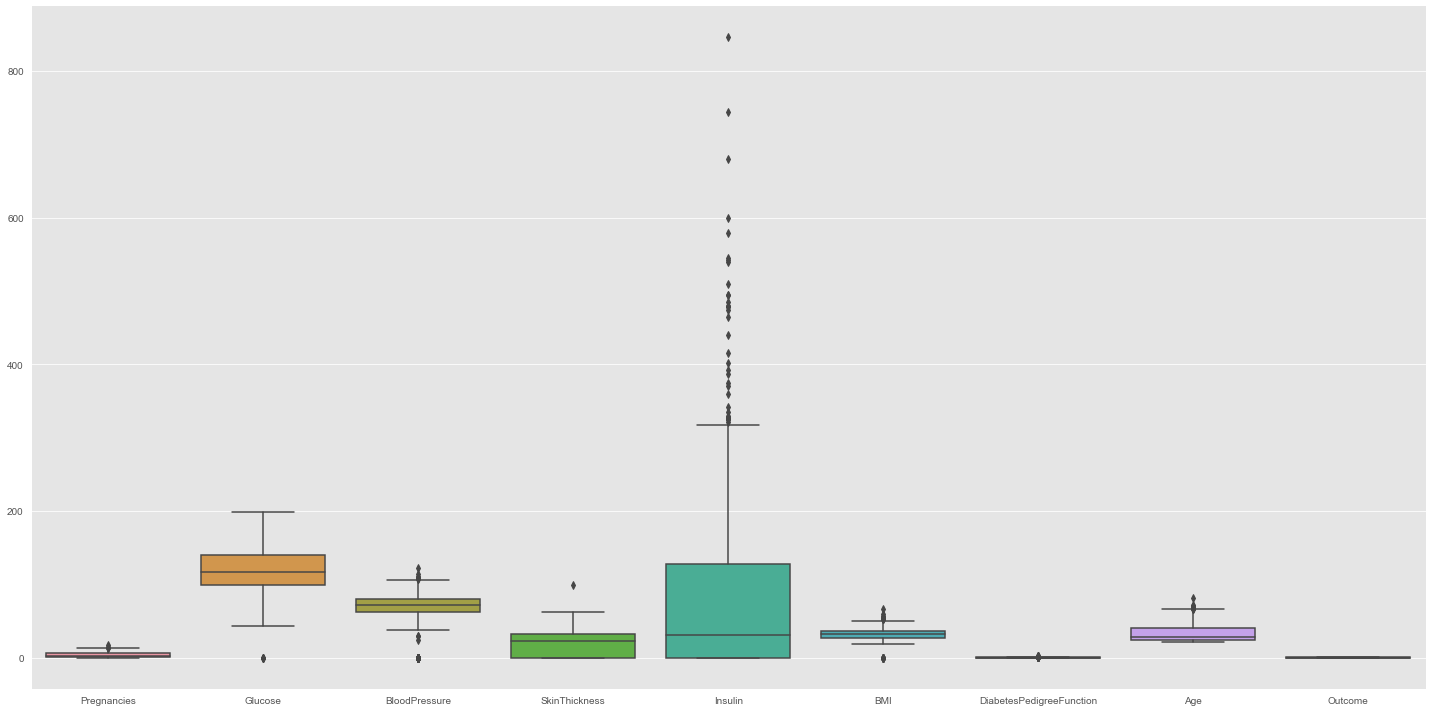

In [16]:
sns.catplot(data= data, kind = 'box', height = 10, aspect= 2)

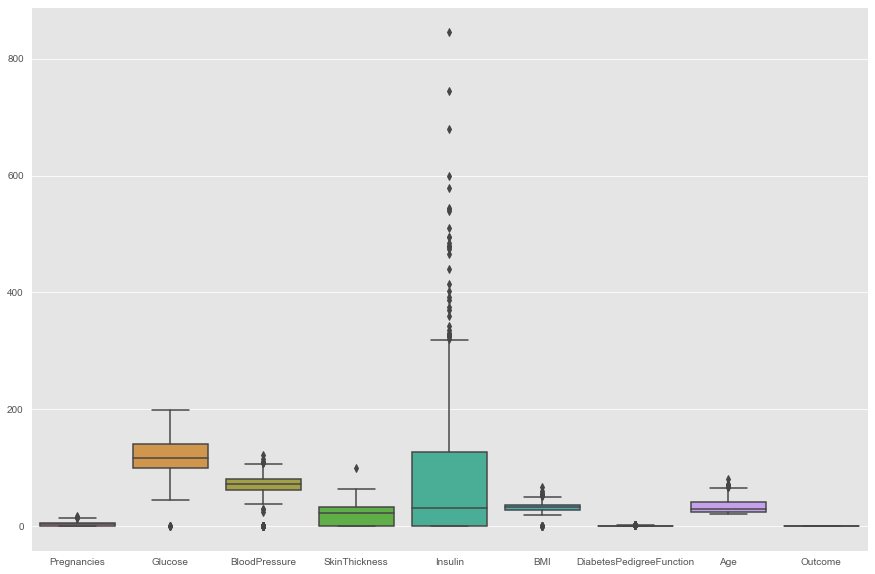

In [17]:
plt.figure(figsize = (15,10))

sns.boxplot(data= data)

## Model building

In [18]:
print(data.columns)

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [19]:
# Sperating iv and dv

X = data[cols]
Y = data['Outcome']

In [20]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, confusion_matrix, auc, classification_report, accuracy_score

from sklearn.naive_bayes import GaussianNB

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 2)

In [22]:
model = GaussianNB() 

In [23]:
model.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
train_pred = model.predict(X_train)

test_pred =model.predict(X_test)

In [25]:
confusion_matrix(Y_train,train_pred)

array([[329,  62],
       [ 82, 141]], dtype=int64)

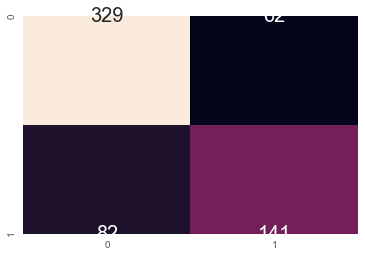

In [26]:
sns.heatmap(confusion_matrix(Y_train,train_pred), annot = True, fmt ='g', annot_kws={"size":20}, cbar = False);

In [27]:
print(classification_report(Y_train,train_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       391
           1       0.69      0.63      0.66       223

    accuracy                           0.77       614
   macro avg       0.75      0.74      0.74       614
weighted avg       0.76      0.77      0.76       614



In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
model_log = LogisticRegression()

In [30]:
model_log.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
pred_log = model_log.predict(X_train)

pred_log_test = model_log.predict(X_test)

In [32]:
print(classification_report(Y_train,pred_log))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       391
           1       0.74      0.59      0.66       223

    accuracy                           0.78       614
   macro avg       0.76      0.74      0.74       614
weighted avg       0.77      0.78      0.77       614



In [33]:
log_score = accuracy_score(Y_train,pred_log)
log_score*100

77.52442996742671

In [34]:
nb_score = accuracy_score(Y_train,train_pred)
nb_score*100

76.54723127035831

## Compare multiple model accuracies using a bar plot

<BarContainer object of 2 artists>

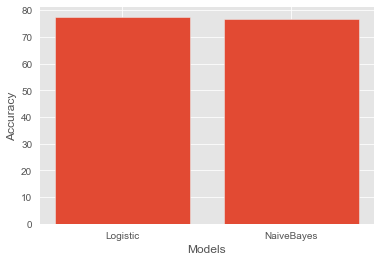

In [35]:
names = ['Logistic', 'NaiveBayes']

res = [log_score*100,nb_score*100]

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.bar(names,res)

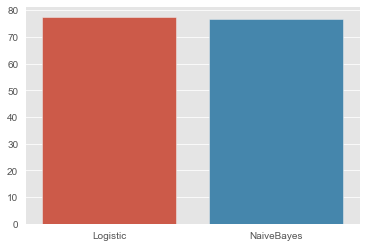

In [36]:
plot = sns.barplot(x=names, y=res)



## Replace zeros with mean

In [37]:
# cols with zero values

zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [38]:
data[data.Glucose == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [39]:
data.Glucose.sum()

92847

In [40]:
data.Glucose.size

768

In [41]:
data.Glucose.sum()/data.Glucose.size

120.89453125

In [42]:
data['Glucose'].mean()

120.89453125

In [43]:
data['Glucose'] = data.Glucose.replace(0,np.NaN)

In [45]:
data.Glucose.isna().sum()

5

In [48]:
data['Glucose'] = data.Glucose.fillna(data.Glucose.mean())

In [49]:
data.Glucose.isna().sum()

0

In [50]:
zero_cols = ['BloodPressure', 'SkinThickness', 'Insulin','BMI']

In [57]:
for column in zero_cols:
    data[column].replace(0,np.NaN, inplace=True)
    data[column] = data[column].fillna(data[column].mean(), inplace= True)


In [58]:
(data ==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64